In [1]:
import cv2

In [2]:
import numpy as np

In [26]:
import math

In [8]:
from matplotlib import pyplot as plt

In [16]:
from scipy.signal import find_peaks

In [24]:
from statistics import mean


In [3]:
saturation=119
hue=82
lightness=119

light_range_l=10/100*255
light_range_h=80/100*255
light_range_m=(light_range_l+light_range_h)/2

In [61]:
hue_list=[]

In [62]:
coords=[]

In [63]:
movements=[]

In [68]:
cap = cv2.VideoCapture('../Downloads/rainsample.MOV')
ret,frame=cap.read()
ret, frame1 = cap.read()
i=0
old_iteration=0

frame1 = cv2.resize(frame1, (568,320))
out=np.full_like(frame1,[0,0,0])
hsv = cv2.cvtColor(frame1,cv2.COLOR_BGR2HSV)
lower_red = np.array([0,120,70])
upper_red = np.array([10,255,255])
mask1 = cv2.inRange(hsv, lower_red, upper_red)
lower_red = np.array([170,120,70])
upper_red = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lower_red,upper_red)
mask1 = mask1+mask2

res = cv2.bitwise_and(frame1,frame1, mask= mask1)



frame1=res
    
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255


while(1):
    
    i=i+1
    frameno=i
    name='windrip3/'+str(frameno) + '.jpg'
    
   
    color = np.uint8([[[hue,saturation,lightness ]]])
    color = cv2.cvtColor(color,cv2.COLOR_HSV2BGR)
    
    ret, frame2 = cap.read()
    
    
    frame2 = cv2.resize(frame2, (568,320))
    orig=frame2.copy()
    
    hsv = cv2.cvtColor(frame2,cv2.COLOR_BGR2HSV)
    lower_red = np.array([0,120,70])
    upper_red = np.array([10,255,255])
    mask1 = cv2.inRange(hsv, lower_red, upper_red)
    lower_red = np.array([170,120,70])
    upper_red = np.array([180,255,255])
    mask2 = cv2.inRange(hsv,lower_red,upper_red)
    mask1 = mask1+mask2

    res = cv2.bitwise_and(frame2,frame2, mask= mask1)
    
    frame2=res
    
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    
    
     
    gray = cv2.cvtColor(rgb,cv2.COLOR_BGR2GRAY)
    ret,thresh_equ = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = np.ones((5,5),np.uint8)
    thresh_equ = cv2.morphologyEx(thresh_equ, cv2.MORPH_OPEN, kernel)
    
    im2, contours, hierarchy = cv2.findContours(thresh_equ, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    cnts=contours
    
    centers=[]
    
    thresh_equ = cv2.merge([thresh_equ,thresh_equ,thresh_equ])
    
    
    
    if len(cnts)!=0:
        c = max(contours, key = cv2.contourArea)
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        
        x,y,w,h = cv2.boundingRect(c)
        roi=hsv[y:y+h,x:x+w ]
        roi2=out[y:y+h,x:x+w ]
        roi2= cv2.cvtColor(roi2,cv2.COLOR_BGR2HSV)
        
        vals=np.reshape(roi,(-1,3))
        vals2=np.reshape(roi2,(-1,3))
        
        flat_vals=np.average(vals,axis=0)
        flat_vals2=np.average(vals2,axis=0)
        
        line=int(flat_vals[2]/35)+1
        hues_detected=flat_vals[0]
        hue_list.append(hues_detected)
        coords.append([cX,cY])
        movements.append(flat_vals[2])
        
        lightness=flat_vals2[2]
        if lightness>light_range_m:
            lightness=np.random.randint(light_range_l, light_range_m)
        if lightness<light_range_m:
            lightness=np.random.randint(light_range_m, light_range_h)
        
        
        
        color[0][0][2]=lightness
        color = tuple ([int(x) for x in color[0][0]])
        cv2.circle(out, (cX, cY),line, color, -1)
        
   
    
    
    print(hues_detected)
    
    cv2.imshow('res',res)
    cv2.imshow('roi',roi)
    cv2.imshow('thresh_equ',thresh_equ)
    cv2.imshow('rgb',rgb)
    
    
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
    prvs = next

cap.release()
cv2.destroyAllWindows()

44.666666666666664
44.666666666666664
44.666666666666664
44.666666666666664
138.59442724458205
51.691489361702125
87.44397759103641
56.10176531671859
147.4347014925373
94.13481800766283
93.49067269643866
90.08536585365853
11.707142857142857
90.2909090909091
15.418803418803419
87.16323529411764
70.79606440071557
82.71666666666667
70.19734432234432
74.73715415019763
119.73217391304348
97.16071428571429
78.01026392961877
28.450805008944545
51.95935314685315
143.63666666666666
60.83529411764706
146.8877551020408
128.57647058823528
42.8778021978022
90.98218181818181
99.60980887125856
114.79121725731895
123.68996960486322
129.50589225589226
103.91651031894935
61.29757949691505
35.64822695035461
24.17015873015873
153.49198717948718
131.0258541089566
119.4729259811227
115.02435064935065
81.49536014140521
49.329081632653065
40.77457627118644
36.31578947368421
98.46735718769617
146.10197368421052
98.4918430335097
19.441408821593154
59.4468984962406
96.23941798941799
49.0156462585034
60.22
165.50

36.78274173806609
43.62197802197802
46.84444444444444
56.89895833333333
57.92357142857143
67.0427807486631
89.18057142857143
114.14648212226066
126.23223039215686
131.3843537414966
138.01027146001468
144.24934895833334
147.4419452887538
151.53191489361703
151.14219114219114
149.0568181818182
145.0719298245614
146.96227621483376
146.98019075568598
147.0314893617021
149.07971014492753
135.875
127.24512820512821
109.77207737594617
96.84343434343434
87.7711962833914
86.67191142191142
78.05922944220816
71.02857142857142
73.69852941176471
74.3125
78.6145181476846
83.88299232736573
84.37460317460318
89.13416815742397
92.6125
96.38125802310655
100.37569444444445
90.87253289473684
86.84334975369458
69.37145969498911
24.3562412342216
46.666666666666664
51.09292929292929
65.04734299516909
59.172222222222224
74.54320987654322
92.20334928229666
106.905
79.79310344827586
89.0
73.52815315315316
23.791666666666668
23.037475345167653
32.53756097560976
23.73355629877369
100.58253968253969
143.3627717391

63.25521350546177
32.53472222222222
44.044117647058826
86.19837398373984
156.0258358662614
143.52083333333334
69.3213141025641
120.97222222222223
50.18216175359032
16.260416666666668
9.753333333333334
19.657770800627944
33.40031397174254
65.56754032258064
76.14260249554367
87.37896592244418
84.54488636363637
88.14336704342654
86.86585365853658
77.12625
79.74556213017752
24.87
96.70466666666667
81.34666666666666
74.6948051948052
67.19202898550725
61.6016
65.16269841269842
54.241379310344826
50.70505050505051
40.71005291005291
30.391975308641975
32.626315789473686
22.179924242424242
19.950216450216452
43.34833091436865
153.26260869565218
97.55763546798029
96.48626373626374
60.85724185724186
27.080246913580247
73.0929054054054
89.34558823529412
90.953125
97.46620689655172
101.11172413793103
123.51315789473684
133.64858490566039
132.28170289855072
29.455555555555556
90.79166666666667
96.19225806451612
91.09166666666667
86.4368530020704
139.49305555555554
13.53625


error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


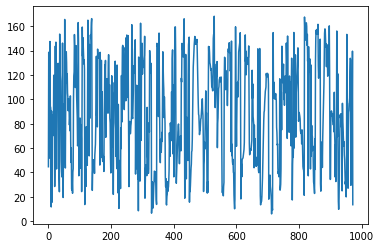

In [54]:
plt.plot(hue_list) # abrupt changes in direction detected using signal peaks 

In [55]:
det_peaks=find_peaks(hue_list)

In [56]:
det_peaks

(array([  1,   3,   5,  10,  12,  14,  17,  22,  24,  31,  36,  45,  49,
         52,  57,  60,  64,  68,  70,  73,  76,  83,  88,  95, 101, 104,
        108, 110, 114, 118, 121, 126, 129, 131, 134, 138, 144, 153, 155,
        157, 161, 163, 165, 169, 171, 176, 180, 182, 186, 189, 192, 195,
        202, 205, 213, 216, 219, 223, 227, 229, 231, 233, 237, 245, 248,
        250, 254, 259, 266, 268, 272, 277, 280, 283, 286, 288, 294, 297,
        299, 302, 307, 311, 315, 321, 323, 328, 331, 338, 342, 346, 349,
        353, 358, 362, 365, 370, 375, 380, 386, 389, 393, 396, 398, 405,
        415, 422, 424, 426, 428, 433, 438, 441, 443, 449, 451, 467, 474,
        491, 498, 502, 504, 508, 511, 513, 519, 527, 529, 536, 538, 547,
        551, 556, 562, 566, 574, 577, 582, 584, 586, 589, 597, 603, 612,
        616, 628, 630, 634, 639, 645, 650, 652, 657, 659, 661, 665, 668,
        672, 674, 678, 695, 698, 705, 707, 713, 717, 719, 725, 731, 734,
        738, 743, 745, 750, 752, 755, 759, 763, 766

In [18]:
large_drops=[5,6,7]

In [19]:
small_drops=[1,2,3,4,5]


In [20]:
small_drops_choice=np.arange(0,len(small_drops))

In [21]:
large_drops_choice=np.arange(0,len(large_drops))

In [22]:
max(movements)

199.9452887537994

In [23]:
min(movements)

14.811891233766234

In [25]:
avg_mvt=mean(movements)


In [46]:
i=0
cap = cv2.VideoCapture('../Downloads/rainsample.MOV')
ret,frame=cap.read()
frame = cv2.resize(frame1, (568,320))
out=np.full_like(frame1,[255,255,255])
color=(0,0,0)
while True:
    name='inky/'+str(i) + '.jpg' #'dir/1.jpg'

    ret, frame2 = cap.read()
    frame2 = cv2.resize(frame2, (568,320))
    draw_center=coords[i]
    if i in det_peaks[0]:
        line=np.random.choice(large_drops_choice)
        line=large_drops[line]
    else:
        line=np.random.choice(small_drops_choice)
        line=small_drops[line]
    
    if i==400:
        color=(92,4,17)
    if(i!=0):
        
        if movements[i]>avg_mvt:
            speed=movements[i]-avg_mvt
            
            dist= math.sqrt(math.pow(coords[i-1][0] - coords[i][0], 2) +
            math.pow(coords[i-1][1] - coords[i][1], 2) * 1.0)
            if dist<20:
                cv2.line(out, (coords[i-1][0],coords[i-1][1]), (coords[i][0],coords[i][1]), color, 1)
        if movements[i]<avg_mvt:
            speed=avg_mvt-movements[i]
      
    
    cv2.circle(out, (draw_center[0], draw_center[1]),line, color, -1)
    
    cv2.imshow('res',out)
    #cv2.imwrite(name,out)

    i=i+1
    
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

IndexError: list index out of range

In [69]:
cap.release()
cv2.destroyAllWindows()